In [1]:
#import libraries
from os import path

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
pylab.rcParams['figure.figsize'] = 12,8

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import warnings
warnings.filterwarnings('ignore')

#set directory
DATA_DIR = '/Users/Alastair/Desktop/python/kaggle/Spaceship Titanic'

In [2]:
#load data
train = pd.read_csv(path.join(DATA_DIR,"train.csv"))
test = pd.read_csv(path.join(DATA_DIR,"test.csv"))

#combine test and train dfs for easy manipulation
combine = [train, test]

In [3]:
# preview the data
train.sample(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
4570,4871_01,Earth,False,F/990/P,PSO J318.5-22,13.0,False,0.0,611.0,0.0,0.0,0.0,Anniey Mccarry,False
6570,6929_03,Earth,False,E/441/P,TRAPPIST-1e,15.0,False,9.0,776.0,4.0,0.0,2.0,Tricki Llovers,True
219,0233_01,Mars,False,F/45/S,TRAPPIST-1e,32.0,False,56.0,0.0,256.0,1438.0,0.0,Teda Wist,False
8173,8733_01,Earth,False,G/1406/S,TRAPPIST-1e,NaN,False,22.0,226.0,0.0,0.0,633.0,Leen Wolfernan,False
7068,7522_01,Earth,False,G/1214/P,TRAPPIST-1e,41.0,False,0.0,0.0,0.0,0.0,908.0,Harlen Cartyernan,False
7675,8192_01,Earth,False,F/1566/S,TRAPPIST-1e,18.0,False,539.0,2.0,3.0,900.0,0.0,Herry Mcphernard,False
294,0326_01,Earth,True,G/47/S,TRAPPIST-1e,29.0,False,0.0,0.0,0.0,0.0,0.0,Charly Edwartizman,False
1907,2043_01,Mars,True,F/395/S,TRAPPIST-1e,24.0,False,NaN,0.0,0.0,0.0,0.0,Goles Teake,True
3493,3753_01,Earth,False,F/776/P,55 Cancri e,55.0,False,0.0,519.0,131.0,63.0,3.0,NaN,False
4875,5201_01,Earth,NaN,F/1060/P,TRAPPIST-1e,21.0,False,1961.0,96.0,0.0,54.0,40.0,Melara Daughtson,False


In [4]:
print (train.info())
print (test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Co

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


# Prepare Data for consumption and perform exploratory analysis

### Feature Creation

In [6]:
#create total spend column 
for df in combine:
    df['total_spend'] = df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

In [7]:
#getting group column from PassengerId
train['group'] = train['PassengerId']
train['group'] = train['group'].str[:-3]

test['group'] = test['PassengerId']
test['group'] = test['group'].str[:-3]

In [8]:
#getting a is_alone column from the group column
train['is_alone'] = ~train['group'].duplicated(keep=False)

test['is_alone'] = ~test['group'].duplicated(keep=False)

In [9]:
#creating new features from cabin
train['deck'] = train['Cabin']
train['deck'] = train['deck'].str[:1]

test['deck'] = test['Cabin']
test['deck'] = test['deck'].str[:1]

#tried creating a 'side' feature for which side of the ship however this provided no benefit
#train['side'] = train['Cabin']
#train['side'] = train['side'].str[-1:]

#test['side'] = test['Cabin']
#test['side'] = test['side'].str[-1:]

### Converting object values in a column to numeric

In [10]:
#find unique values to replace
#print(train['side'].unique())
print(train['deck'].unique())
print(train['Destination'].unique())
print(train['HomePlanet'].unique())

['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
['Europa' 'Earth' 'Mars' nan]


In [11]:
#replace values
#train['side'] = train['side'].map( {'P': 0, 'S': 1} )
train['Destination'] = train['Destination'].map( {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2} )
train['HomePlanet'] = train['HomePlanet'].map( {'Europa': 0, 'Earth': 1, 'Mars': 2} )
train['deck'] = train['deck'].map( {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7} )

#test['side'] = test['side'].map( {'P': 0, 'S': 1} )
test['Destination'] = test['Destination'].map( {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2} )
test['HomePlanet'] = test['HomePlanet'].map( {'Europa': 0, 'Earth': 1, 'Mars': 2} )
test['deck'] = test['deck'].map( {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'T': 7} )

train['CryoSleep'] = train['CryoSleep'].map( {False: 0, True: 1} )
train['VIP'] = train['VIP'].map( {False: 0, True: 1} )
train['is_alone'] = train['is_alone'].map( {False: 0, True: 1} )

test['CryoSleep'] = test['CryoSleep'].map( {False: 0, True: 1} )
test['VIP'] = test['VIP'].map( {False: 0, True: 1} )
test['is_alone'] = test['is_alone'].map( {False: 0, True: 1} )

In [12]:
#inspect dataset again since new features have been added
train.describe()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,total_spend,is_alone,deck
count,8492.000000,8476.000000,8511.000000,8514.000000,8490.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8693.000000,8693.000000,8494.000000
mean,0.956194,0.358306,0.516508,28.827930,0.023439,224.687617,458.077203,173.729169,311.138778,304.854791,1440.866329,0.552744,4.305392
std,0.675435,0.479531,0.820237,14.489021,0.151303,666.717663,1611.489240,604.696458,1136.705535,1145.717189,2803.045694,0.497239,1.778233
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000,1.000000,5.000000
75%,1.000000,1.000000,1.000000,38.000000,0.000000,47.000000,76.000000,27.000000,59.000000,46.000000,1441.000000,1.000000,6.000000
max,2.000000,1.000000,2.000000,79.000000,1.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,1.000000,7.000000


### Filling Null Values

For a lot of these values I will need to fill the null values. Rather than just filling with the mean or mode for the whole feature I will use correlated features to filter the feature into representative groups to be able to fill the nulls with more accurate guesses

#### Name Length

In [13]:
#creating a name length column since that was a good feature in the previous Kaggle Titanic competition
train['Name_length'] = train['Name'].dropna().apply(len)
test['Name_length'] = test['Name'].dropna().apply(len)

#removing nulls

# preparing an empty array to contain guessed Name_length values based on HomePlanet
NameLength_guess = np.zeros(3)
NameLength_guess

#get guesses for each HomePlanet value
for i in range(3):
    guess_df = train[(train['HomePlanet'] == i)]['Name_length'].dropna()

    NameLength_guess[i] = guess_df.mean()

#fill the data with the guesses
for i in range(3):
    train.loc[ (train.Name.isnull()) & (train.HomePlanet == i),'Name_length'] = NameLength_guess[i]

for i in range(3):
    test.loc[ (test.Name.isnull()) & (test.HomePlanet == i),'Name_length'] = NameLength_guess[i]

#filling nulls that still remain
train.loc[(train.Name_length.isnull()),'Name_length'] = train['Name_length'].mean()
test.loc[(test.Name_length.isnull()),'Name_length'] = train['Name_length'].mean()

#### Deck and Side

In [14]:
#investigating whether group can be used for filling in the deck and side nulls
notalone = train.loc[train['is_alone'] == 0]

#create a combination of deck and group to see how many unique values there are compared to just group
notalone['deck_group'] = notalone['deck'].astype(str) + notalone['group']
uniqueDG = notalone['deck_group'].nunique()
uniqueG = notalone['group'].nunique()

#commented out since no longer using side
#notalone['side_group'] = notalone['side'].astype(str) + notalone['group']
#uniqueSG = notalone['side_group'].nunique()

print('Number of unique values in column "deck_group" of the dataframe : ')
print(uniqueDG)
print('Number of unique values in column "group" of the dataframe : ')
print(uniqueG)
print('Percentage of passengers from the same group who were on the same deck : ')
print(uniqueG/uniqueDG*100)

#commented out since no longer using side
#print('Number of unique values in column "side_group" of the dataframe : ')
#print(uniqueSG)
#print('Number of unique values in column "group" of the dataframe : ')
#print(uniqueG)
#print('Percentage of passengers from the same group who were on the same side : ')
#print(uniqueG/uniqueSG*100)

Number of unique values in column "deck_group" of the dataframe : 
1954
Number of unique values in column "group" of the dataframe : 
1412
Percentage of passengers from the same group who were on the same deck : 
72.26202661207779


In [15]:
#since the majority of passengers who were from the same group were on the same deck I shall use this to replace them
group_series = train['group'].loc[train['group'].duplicated() & train['deck'].isnull()] #find groups with >1 person
group_list = group_series.tolist() #convert to list
group_df = pd.DataFrame({"group": group_series}) #convert to df
group_df['deck'] = "" #set up df for later
print(len(group_list)) #find out how many there are to be replaced
train_len = len(group_list)

group_series_test = test['group'].loc[test['group'].duplicated() & test['deck'].isnull()] #find groups with >1 person
group_list_test = group_series_test.tolist() #convert to list
group_df_test = pd.DataFrame({"group": group_series_test}) #convert to df
group_df_test['deck'] = "" #set up df for later
print(len(group_list_test)) #find out how many there are to be replaced
test_len = len(group_list_test)

65
24


In [16]:
deckguess_list = ['']*train_len #set up empty list for deck guesses

#calculate the mean deck for each group 
for i in range(train_len):
    deckguess_list[i] = train['deck'].loc[train['group'] == group_list[i]].dropna().mean()

#insert the guesses into the original df
group_df['deck'] = deckguess_list
guess_indicies = group_df.index

train.loc[guess_indicies, 'deck'] = group_df['deck']

#repeat for test
deckguess_list_test = ['']*test_len

for i in range(test_len):
    deckguess_list_test[i] = test['deck'].loc[test['group'] == group_list_test[i]].dropna().mean()

group_df_test['deck'] = deckguess_list_test
guess_indicies_test = group_df_test.index

test.loc[guess_indicies_test, 'deck'] = group_df_test['deck']

In [17]:
#filling the rest of the decks with HomePlanet modes since this was shown to have a strong correlation

# preparing an empty array to contain guessed Deck values based on HomePlanet
deck_guess = np.zeros(3)
deck_guess

#get guesses for each HomePlanet value
for i in range(2):
    guess_df = train[(train['HomePlanet'] == i)]['deck'].dropna()

    deck_guess[i] = guess_df.mode()

#fill the data with the guesses
for i in range(3):
    train.loc[ (train.deck.isnull()) & (train.HomePlanet == i),'deck'] = deck_guess[i]

for i in range(3):
    test.loc[ (test.deck.isnull()) & (test.HomePlanet == i),'deck'] = deck_guess[i]
    
#filling the deck nulls that are also Home Planet nulls
print(train['deck'].mode())
train.loc[(train.deck.isnull()),'deck'] = 5
test.loc[(test.deck.isnull()),'deck'] = 5

#make ints
train['deck'] = train['deck'].astype(int)
test['deck'] = test['deck'].astype(int)

0    5.0
dtype: float64


In [18]:
#repeating process with 'side' - commented out since no longer using side

#group_series = train['group'].loc[train['group'].duplicated() & train['side'].isnull()] #find groups with >1 person
#group_list = group_series.tolist()
#group_df = pd.DataFrame({"group": group_series})
#group_df['side'] = "" #set up df for later
#print(len(group_list)) #find out how many there are to be replaced
#train_len = len(group_list)

#group_series_test = test['group'].loc[test['group'].duplicated() & test['side'].isnull()] #find groups with >1 person
#group_list_test = group_series_test.tolist()
#group_df_test = pd.DataFrame({"group": group_series_test})
#group_df_test['side'] = "" #set up df for later
#print(len(group_list_test)) #find out how many there are to be replaced
#test_len = len(group_list_test)

In [19]:
#commented out since no longer using side
#sideguess_list = ['']*train_len #set up empty list for side guesses

#calculate the mean side for each group 
#for i in range(train_len):
#    sideguess_list[i] = train['side'].loc[train['group'] == group_list[i]].dropna().mean()

#insert the guesses into the original df
#group_df['side'] = sideguess_list
#guess_indicies = group_df.index

#train.loc[guess_indicies, 'side'] = group_df['side']

#repeat for test
#sideguess_list_test = ['']*test_len

#for i in range(test_len):
#    sideguess_list_test[i] = test['side'].loc[test['group'] == group_list_test[i]].dropna().mean()

#group_df_test['side'] = sideguess_list_test
#guess_indicies_test = group_df_test.index

#test.loc[guess_indicies_test, 'side'] = group_df_test['side']

#### Home Planet

0    1.0
dtype: float64


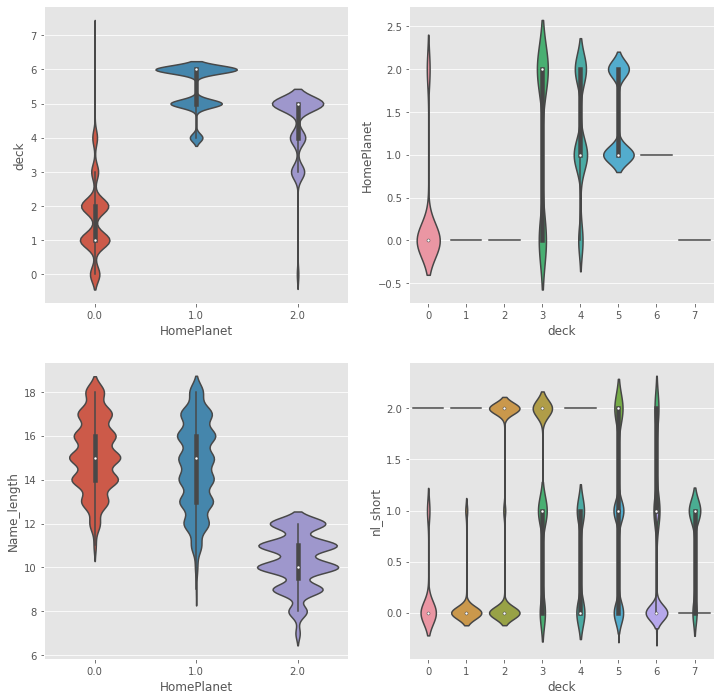

In [20]:
#investigating Home Planet for filling in Nulls
fig, saxis = plt.subplots(2,2,figsize=(12,12)) 
#plotting the features which had the strongest correlation with HomePlanet
sns.violinplot(x = 'HomePlanet', y = 'deck', data=train, ax = saxis[0,0])
sns.violinplot(x = 'deck', y = 'HomePlanet', data=train, ax = saxis[0,1])
sns.violinplot(x = 'HomePlanet', y = 'Name_length', data=train, ax = saxis[1,0])
sns.violinplot(x = 'Name_length', y = 'HomePlanet', data=train, ax = saxis[1,1])

#creating new name length short feature since this was shown to have a strong correlation with Home Planet
train.loc[ train['Name_length'] <= 12.5, 'nl_short'] = 1
train.loc[ train['Name_length'] > 12.5, 'nl_short'] = 0

test.loc[ test['Name_length'] <= 12.5, 'nl_short'] = 1
test.loc[ test['Name_length'] > 12.5, 'nl_short'] = 0

sns.violinplot(x = 'deck', y = 'nl_short', data=train)

# preparing an empty array to contain guessed HomePlanet values based on deck x name_length combinations - missing deck 7 because not enough data
HomePlanet_guess = np.zeros((2,7))
HomePlanet_guess

# now we iterate over nl_short and deck to calculate guessed values of HomePlanet
for i in range(2):
    for j in range(7):
        guess_df = train[(train['nl_short'] == i) & (train['deck'] == j)]['HomePlanet'].dropna()

        HomePlanet_guess[i,j] = guess_df.mode()

#insert guesses
for i in range(2):
    for j in range(7):
        train.loc[ (train.HomePlanet.isnull()) & (train.nl_short == i) & (train.deck == j),'HomePlanet'] = HomePlanet_guess[i,j]

for i in range(2):
    for j in range(7):
        test.loc[ (test.HomePlanet.isnull()) & (test.nl_short == i) & (test.deck == j),'HomePlanet'] = HomePlanet_guess[i,j]
        
#filling the HomePlanet nulls that are also Home Planet nulls
print(train['HomePlanet'].mode())

train.loc[(train.HomePlanet.isnull()),'HomePlanet'] = 1
test.loc[(test.HomePlanet.isnull()),'HomePlanet'] = 1

#make ints
train['HomePlanet'] = train['HomePlanet'].astype(int)
test['HomePlanet'] = test['HomePlanet'].astype(int)

#### 'Spending' Catergories

<AxesSubplot:xlabel='Age', ylabel='total_spend'>

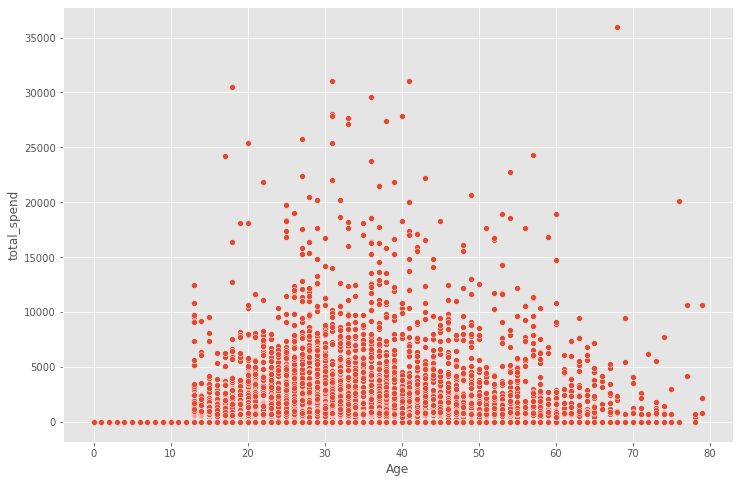

In [21]:
#investigating relationship between spend and Age for filling nulls
sns.scatterplot(x = 'Age', y = 'total_spend', data=train)

In [22]:
#appears to be a minimum age to spend - fill nulls below this age with 0
#creating new variables to help with the exploration of the spending catergories
spenders = train.loc[train['total_spend'] > 0]
big_spenders = train.loc[train['total_spend'] > 5000]
spend_list = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

#find minimum age at which they were allowed to spend
min_age = spenders['Age'].min()

#filling nulls with 0 where the age is below the minimum
for spend in spend_list:
    train.loc[(train['Age'] < min_age) & (train[spend].isnull()), spend] = 0
    test.loc[(test['Age'] < min_age) & (test[spend].isnull()), spend] = 0

In [23]:
#all the spend columns are heavily skewed (75% of data is 0) therefore I will just make columns saying whether they spent any money in those areas
#create list of columns to fill for each spending variable
spendBin_list = ['RoomServiceBin','FoodCourtBin','ShoppingMallBin','SpaBin','VRDeckBin']

#create has_spent column if the total spend is above zero
train['has_spent'] = np.nan
train.loc[train['total_spend'] == 0, 'has_spent'] = 0
train.loc[train['total_spend'] > 0, 'has_spent'] = 1
#repeat for test df
test['has_spent'] = np.nan
test.loc[test['total_spend'] == 0, 'has_spent'] = 0
test.loc[test['total_spend'] > 0, 'has_spent'] = 1

#repeat for the rest of the spending variables
for spend,spendBin in zip(spend_list,spendBin_list):
    train[spendBin] = np.nan
    train.loc[train[spend] == 0, spendBin] = 0
    train.loc[train[spend] > 0, spendBin] = 1

    test[spendBin] = np.nan
    test.loc[test[spend] == 0, spendBin] = 0
    test.loc[test[spend] > 0, spendBin] = 1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


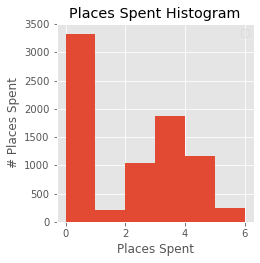

In [24]:
#investigating the spending column nulls
#create new variable 'places spent' for how many of the different venues the passenger sepnt at
train['places_spent'] = train['RoomServiceBin'] + train['FoodCourtBin'] + train['ShoppingMallBin'] + train['SpaBin'] + train['VRDeckBin']
test['places_spent'] = test['RoomServiceBin'] + test['FoodCourtBin'] + test['ShoppingMallBin'] + test['SpaBin'] + test['VRDeckBin']

#represent this with a histogram
plt.subplot(234)
plt.hist(x = [train['places_spent']], bins=range(0,7))
plt.title('Places Spent Histogram')
plt.xlabel('Places Spent')
plt.ylabel('# Places Spent')
plt.legend()

<AxesSubplot:xlabel='places_spent', ylabel='VRDeck'>

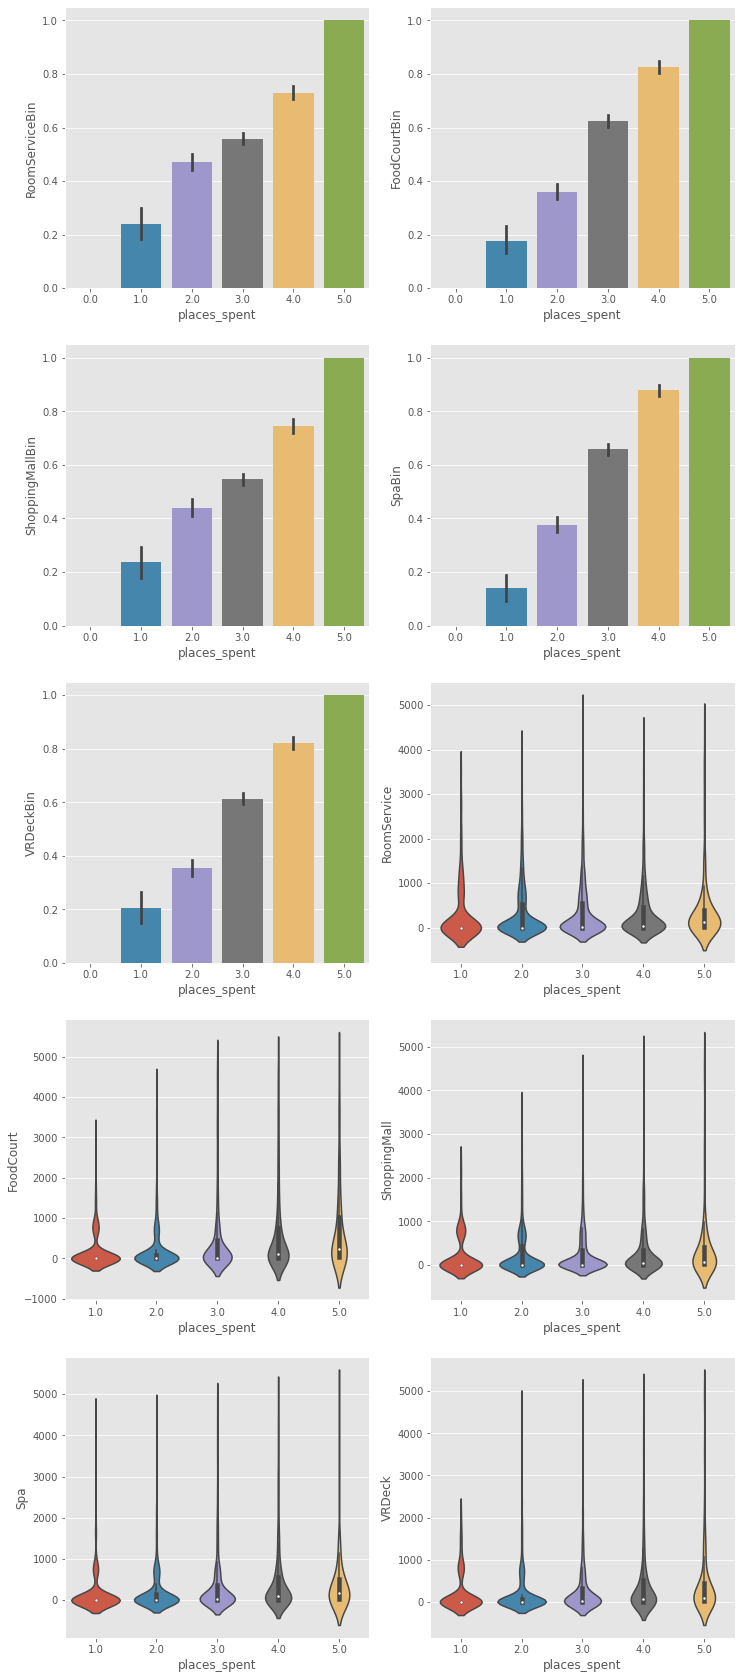

In [25]:
#creating spenders again to include the bin columns
spenders_butnotbig = train.loc[(train['total_spend'] > 0) & (train['RoomService'] < 5000) & (train['FoodCourt'] < 5000) & (train['ShoppingMall'] < 5000) & (train['Spa'] < 5000) & (train['VRDeck'] < 5000)]

#investigating the whether there is a difference between 'places_spent' and the different locations
fig, saxis = plt.subplots(5,2,figsize=(12,30)) 

sns.barplot(x = 'places_spent', y = 'RoomServiceBin', data=train, ax = saxis[0,0])
sns.barplot(x = 'places_spent', y = 'FoodCourtBin', data=train, ax = saxis[0,1])
sns.barplot(x = 'places_spent', y = 'ShoppingMallBin', data=train, ax = saxis[1,0])
sns.barplot(x = 'places_spent', y = 'SpaBin', data=train, ax = saxis[1,1])
sns.barplot(x = 'places_spent', y = 'VRDeckBin', data=train, ax = saxis[2,0])

sns.violinplot(x = 'places_spent', y = 'RoomService', data=spenders_butnotbig, ax = saxis[2,1])
sns.violinplot(x = 'places_spent', y = 'FoodCourt', data=spenders_butnotbig, ax = saxis[3,0])
sns.violinplot(x = 'places_spent', y = 'ShoppingMall', data=spenders_butnotbig, ax = saxis[3,1])
sns.violinplot(x = 'places_spent', y = 'Spa', data=spenders_butnotbig, ax = saxis[4,0])
sns.violinplot(x = 'places_spent', y = 'VRDeck', data=spenders_butnotbig, ax = saxis[4,1])

In [26]:
#Number of people who only spent in one place is very small therefore if one of the spending columns is a null but the rest are 0 I shall fill with null
for spend in spend_list:
    train.loc[(train['has_spent'] == 0) & (train[spend].isnull()), spend] = 0
    test.loc[(test['has_spent'] == 0) & (test[spend].isnull()), spend] = 0
    
#Number of people who only spent in 4 places but not the 5th is very small therefore I shall fill these nulls with 1
for spend in spend_list:
    train.loc[(train['places_spent'] == 4) & (train[spend].isnull()), spend] = 1
    test.loc[(test['places_spent'] == 4) & (test[spend].isnull()), spend] = 1
    
for spend in spend_list:
    train.loc[(train['places_spent'] == 1) & (train[spend].isnull()), spend] = 0
    test.loc[(test['places_spent'] == 1) & (test[spend].isnull()), spend] = 0

<AxesSubplot:xlabel='FoodCourtBin', ylabel='VRDeckBin'>

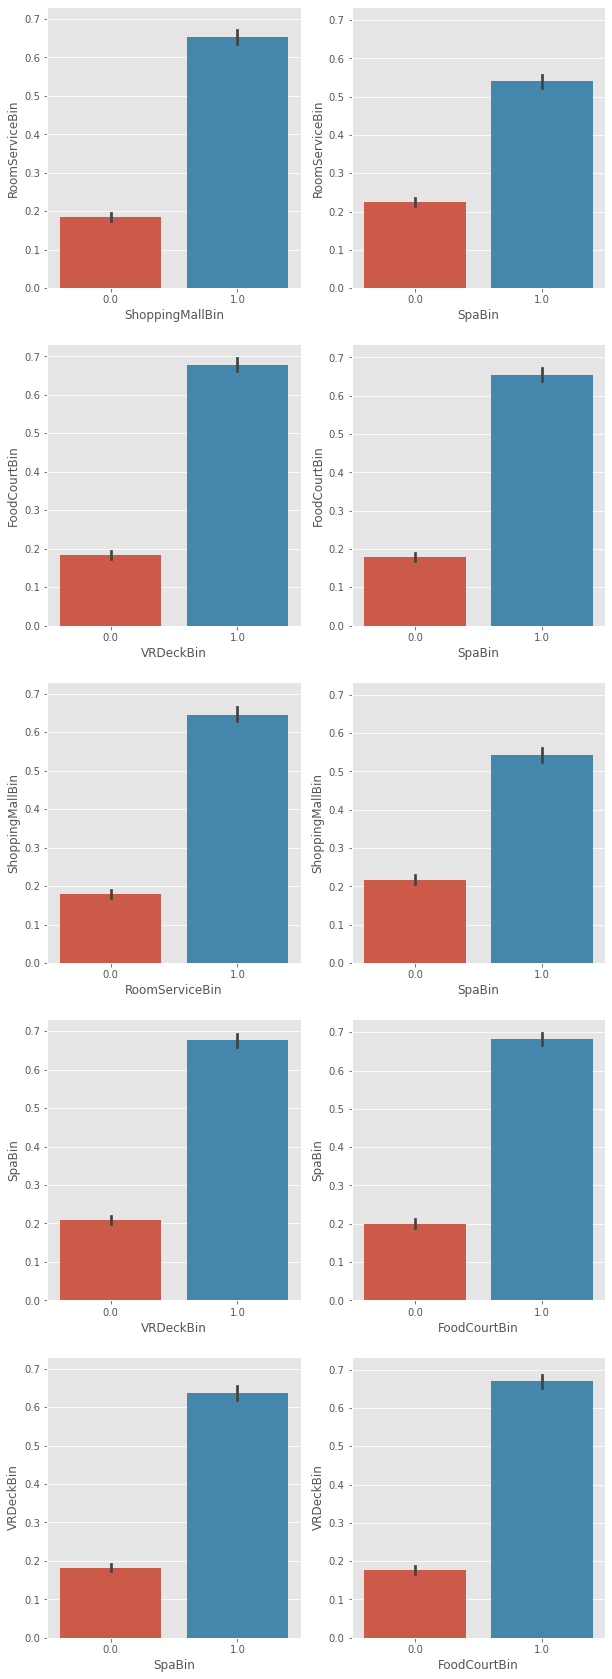

In [27]:
#investigating the relationship between the spending feature and its two most highly correlated spending feature for each one
fig, saxis = plt.subplots(5,2,figsize=(10,30),sharey='col') 

sns.barplot(x = 'ShoppingMallBin', y = 'RoomServiceBin', data=train, ax = saxis[0,0])
sns.barplot(x = 'SpaBin', y = 'RoomServiceBin', data=train, ax = saxis[0,1])

sns.barplot(x = 'VRDeckBin', y = 'FoodCourtBin', data=train, ax = saxis[1,0])
sns.barplot(x = 'SpaBin', y = 'FoodCourtBin', data=train, ax = saxis[1,1])

sns.barplot(x = 'RoomServiceBin', y = 'ShoppingMallBin', data=train, ax = saxis[2,0])
sns.barplot(x = 'SpaBin', y = 'ShoppingMallBin', data=train, ax = saxis[2,1])

sns.barplot(x = 'VRDeckBin', y = 'SpaBin', data=train, ax = saxis[3,0])
sns.barplot(x = 'FoodCourtBin', y = 'SpaBin', data=train, ax = saxis[3,1])

sns.barplot(x = 'SpaBin', y = 'VRDeckBin', data=train, ax = saxis[4,0])
sns.barplot(x = 'FoodCourtBin', y = 'VRDeckBin', data=train, ax = saxis[4,1])

In [28]:
#filling remaining nulls with the mode (0)
for spendBin in spendBin_list:
    train.loc[(train[spendBin].isnull()),spendBin] = 0
    test.loc[(test[spendBin].isnull()),spendBin] = 0

#recalculate places_spent
train['places_spent'] = train['RoomServiceBin'] + train['FoodCourtBin'] + train['ShoppingMallBin'] + train['SpaBin'] + train['VRDeckBin']
test['places_spent'] = test['RoomServiceBin'] + test['FoodCourtBin'] + test['ShoppingMallBin'] + test['SpaBin'] + test['VRDeckBin']

In [29]:
#Using places spend to fill in the mean for the spendign catergories 
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
RSB_guess = np.zeros((2,2))
RSB_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(2):
        guess_df = train[(train['ShoppingMallBin'] == i) & (train['SpaBin'] == j)]['RoomServiceBin'].dropna()

        RSB_guess[i,j] = guess_df.mode()
        
for i in range(2):
    for j in range(2):
        train.loc[ (train.RoomServiceBin.isnull()) & (train.ShoppingMallBin == i) & (train.SpaBin == j),'RoomServiceBin'] = RSB_guess[i,j]

for i in range(2):
    for j in range(2):
        test.loc[ (test.RoomServiceBin.isnull()) & (test.ShoppingMallBin == i) & (test.SpaBin == j),'RoomServiceBin'] = RSB_guess[i,j]

# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
FCB_guess = np.zeros((2,2))
FCB_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(2):
        guess_df = train[(train['VRDeckBin'] == i) & (train['SpaBin'] == j)]['FoodCourtBin'].dropna()

        FCB_guess[i,j] = guess_df.mode()
        
for i in range(2):
    for j in range(2):
        train.loc[ (train.FoodCourtBin.isnull()) & (train.VRDeckBin == i) & (train.SpaBin == j),'FoodCourtBin'] = FCB_guess[i,j]

for i in range(2):
    for j in range(2):
        test.loc[ (test.FoodCourtBin.isnull()) & (test.VRDeckBin == i) & (test.SpaBin == j),'FoodCourtBin'] = FCB_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
SMB_guess = np.zeros((2,2))
SMB_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(2):
        guess_df = train[(train['RoomServiceBin'] == i) & (train['SpaBin'] == j)]['ShoppingMallBin'].dropna()

        SMB_guess[i,j] = guess_df.mode()
        
for i in range(2):
    for j in range(2):
        train.loc[ (train.ShoppingMallBin.isnull()) & (train.RoomServiceBin == i) & (train.SpaBin == j),'ShoppingMallBin'] = SMB_guess[i,j]

for i in range(2):
    for j in range(2):
        test.loc[ (test.ShoppingMallBin.isnull()) & (test.RoomServiceBin == i) & (test.SpaBin == j),'ShoppingMallBin'] = SMB_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
SB_guess = np.zeros((2,2))
SB_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(2):
        guess_df = train[(train['VRDeckBin'] == i) & (train['FoodCourtBin'] == j)]['SpaBin'].dropna()

        SB_guess[i,j] = guess_df.mode()
        
for i in range(2):
    for j in range(2):
        train.loc[ (train.SpaBin.isnull()) & (train.VRDeckBin == i) & (train.FoodCourtBin == j),'SpaBin'] = SB_guess[i,j]

for i in range(2):
    for j in range(2):
        test.loc[ (test.SpaBin.isnull()) & (test.VRDeckBin == i) & (test.FoodCourtBin == j),'SpaBin'] = SB_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
VRDB_guess = np.zeros((2,2))
VRDB_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(2):
        guess_df = train[(train['FoodCourtBin'] == i) & (train['SpaBin'] == j)]['VRDeckBin'].dropna()

        VRDB_guess[i,j] = guess_df.mode()
        
for i in range(2):
    for j in range(2):
        train.loc[ (train.VRDeckBin.isnull()) & (train.FoodCourtBin == i) & (train.SpaBin == j),'VRDeckBin'] = VRDB_guess[i,j]

for i in range(2):
    for j in range(2):
        test.loc[ (test.VRDeckBin.isnull()) & (test.FoodCourtBin == i) & (test.SpaBin == j),'VRDeckBin'] = VRDB_guess[i,j]

In [30]:
#using the 2 most correlated features to guess the rest of the null values for each spending feature
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
RS_guess = np.zeros((2,5))
RS_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(5):
        guess_df = train[(train['RoomServiceBin'] == i) & (train['places_spent'] == j)]['RoomService'].dropna()

        RS_guess[i,j] = guess_df.mean()
        
for i in range(2):
    for j in range(5):
        train.loc[ (train.RoomService.isnull()) & (train.RoomServiceBin == i) & (train.places_spent == j),'RoomService'] = RS_guess[i,j]

for i in range(2):
    for j in range(5):
        test.loc[ (test.RoomService.isnull()) & (test.RoomServiceBin == i) & (test.places_spent == j),'RoomService'] = RS_guess[i,j]

# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
FC_guess = np.zeros((2,5))
FC_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(5):
        guess_df = train[(train['FoodCourtBin'] == i) & (train['places_spent'] == j)]['FoodCourt'].dropna()

        FC_guess[i,j] = guess_df.mean()
        
for i in range(2):
    for j in range(5):
        train.loc[ (train.FoodCourt.isnull()) & (train.FoodCourtBin == i) & (train.places_spent == j),'FoodCourt'] = FC_guess[i,j]

for i in range(2):
    for j in range(5):
        test.loc[ (test.FoodCourt.isnull()) & (test.FoodCourtBin == i) & (test.places_spent == j),'FoodCourt'] = FC_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
SM_guess = np.zeros((2,5))
SM_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(5):
        guess_df = train[(train['ShoppingMallBin'] == i) & (train['places_spent'] == j)]['ShoppingMall'].dropna()

        SM_guess[i,j] = guess_df.mean()
        
for i in range(2):
    for j in range(5):
        train.loc[ (train.ShoppingMall.isnull()) & (train.ShoppingMallBin == i) & (train.places_spent == j),'ShoppingMall'] = SM_guess[i,j]

for i in range(2):
    for j in range(5):
        test.loc[ (test.ShoppingMall.isnull()) & (test.ShoppingMallBin == i) & (test.places_spent == j),'ShoppingMall'] = SM_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
S_guess = np.zeros((2,5))
S_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(5):
        guess_df = train[(train['SpaBin'] == i) & (train['places_spent'] == j)]['Spa'].dropna()

        S_guess[i,j] = guess_df.mean()
        
for i in range(2):
    for j in range(5):
        train.loc[ (train.Spa.isnull()) & (train.SpaBin == i) & (train.places_spent == j),'Spa'] = S_guess[i,j]

for i in range(2):
    for j in range(5):
        test.loc[ (test.Spa.isnull()) & (test.SpaBin == i) & (test.places_spent == j),'Spa'] = S_guess[i,j]
        
# preparing an empty array to contain guessed Feature 1 values based on Feature 2 x Feature 3 combinations 
VRD_guess = np.zeros((2,5))
VRD_guess

# now we iterate over Feature 2 and Feature 3 to calculate guessed values of Feature 1 
for i in range(2):
    for j in range(5):
        guess_df = train[(train['VRDeckBin'] == i) & (train['places_spent'] == j)]['VRDeck'].dropna()

        VRD_guess[i,j] = guess_df.mean()
        
for i in range(2):
    for j in range(5):
        train.loc[ (train.VRDeck.isnull()) & (train.VRDeckBin == i) & (train.places_spent == j),'VRDeck'] = VRD_guess[i,j]

for i in range(2):
    for j in range(5):
        test.loc[ (test.VRDeck.isnull()) & (test.VRDeckBin == i) & (test.places_spent == j),'VRDeck'] = VRD_guess[i,j]

In [31]:
#creating a log of the spending columns since they're so skewed so cant do normal bins to reduce overfitting
#create list of columns to fill for each spending variable
spendLog_list = ['RoomServiceLog','FoodCourtLog','ShoppingMallLog','SpaLog','VRDeckLog']

#create has_spent column if the total spend is above zero
train['total_spend_log'] = np.log10(train['total_spend'])
train['total_spend_log'].loc[train['total_spend_log'] == np.NINF] = 0
#repeat for test df
test['total_spend_log'] = np.log10(test['total_spend'])
test['total_spend_log'].loc[test['total_spend_log'] == np.NINF] = 0

#repeat for the rest of the spending variables
for spend,spendLog in zip(spend_list,spendLog_list):
    train[spendLog] = np.log10(train[spend])
    train[spendLog].loc[train[spendLog] == np.NINF] = 0
    test[spendLog] = np.log10(test[spend])
    test[spendLog].loc[test[spendLog] == np.NINF] = 0


#### Cryo Sleep

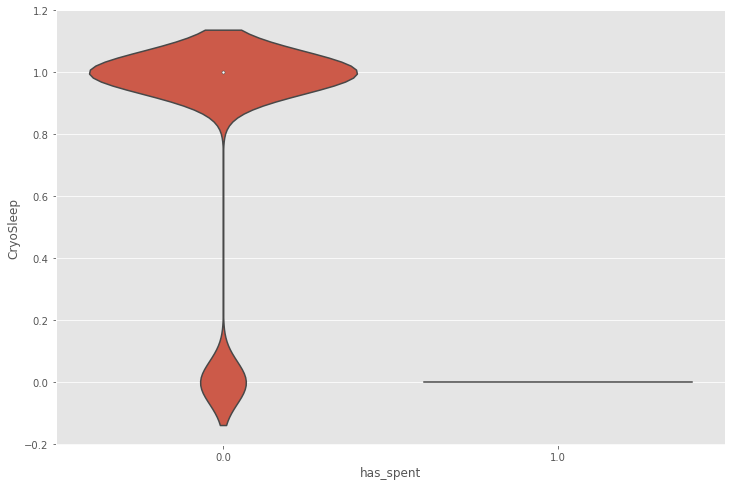

In [32]:
#investigating relationship between Cryosleep and has_spent
sns.violinplot(x = 'has_spent', y = 'CryoSleep', data=train)

#strong correlation so will use this to fill the CryoSleep nulls
# preparing an empty array to contain guessed CryoSleep values based on has_spent
CryoSleep_guess = np.zeros(2)
CryoSleep_guess

for i in range(2):
    guess_df = train[(train['has_spent'] == i)]['CryoSleep'].dropna()

    CryoSleep_guess[i] = guess_df.mode()
        
for i in range(2):
    train.loc[ (train.CryoSleep.isnull()) & (train.has_spent == i),'CryoSleep'] = CryoSleep_guess[i]

for i in range(2):
    test.loc[ (test.CryoSleep.isnull()) & (test.has_spent == i),'CryoSleep'] = CryoSleep_guess[i]

#### Destination

0    0.0
dtype: float64


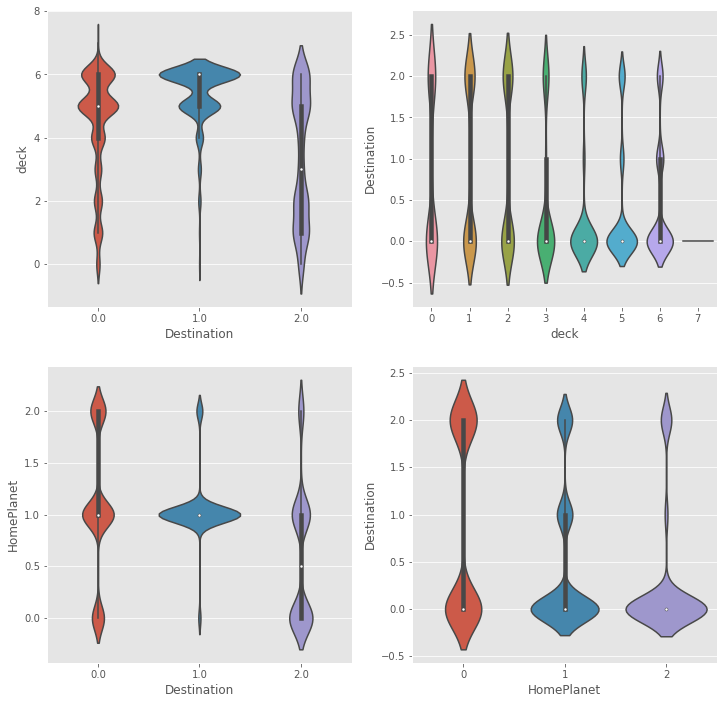

In [33]:
#investigating Destination for filling in Nulls
#plotting the features which had the strongest correlation with Destination
fig, saxis = plt.subplots(2,2,figsize=(12,12)) 

sns.violinplot(x = 'Destination', y = 'deck', data=train, ax = saxis[0,0])
sns.violinplot(x = 'deck', y = 'Destination', data=train, ax = saxis[0,1])
sns.violinplot(x = 'Destination', y = 'HomePlanet', data=train, ax = saxis[1,0])
sns.violinplot(x = 'HomePlanet', y = 'Destination', data=train, ax = saxis[1,1])

#strong relationship between deck and HomePlanet with desitnation so will use these to fill the Destination nulls
# preparing an empty array to contain guessed Destination values based on HomePlanet x Deck combinations
Destination_guess = np.zeros((3,8))
Destination_guess

# now we iterate over HomePlanet and Deck to calculate guessed values of Destination
for i in range(3):
    for j in range(8):
        guess_df = train[(train['HomePlanet'] == i) & (train['deck'] == j)]['Destination'].dropna()

        Destination_guess[i,j] = guess_df.mean()

#fill nulls with guesses
for i in range(3):
    for j in range(8):
        train.loc[ (train.Destination.isnull()) & (train.HomePlanet == i) & (train.deck == j),'Destination'] = Destination_guess[i,j]
#repeat for test df
for i in range(3):
    for j in range(8):
        test.loc[ (test.Destination.isnull()) & (test.HomePlanet == i) & (test.deck == j),'Destination'] = Destination_guess[i,j]
        
#filling the Destination nulls that are also Home Planet nulls etc

print(train['Destination'].mode())

train.loc[(train.Destination.isnull()),'Destination'] = 0
test.loc[(test.Destination.isnull()),'Destination'] = 0

#make ints
train['Destination'] = train['Destination'].astype(int)
test['Destination'] = test['Destination'].astype(int)

#### Age

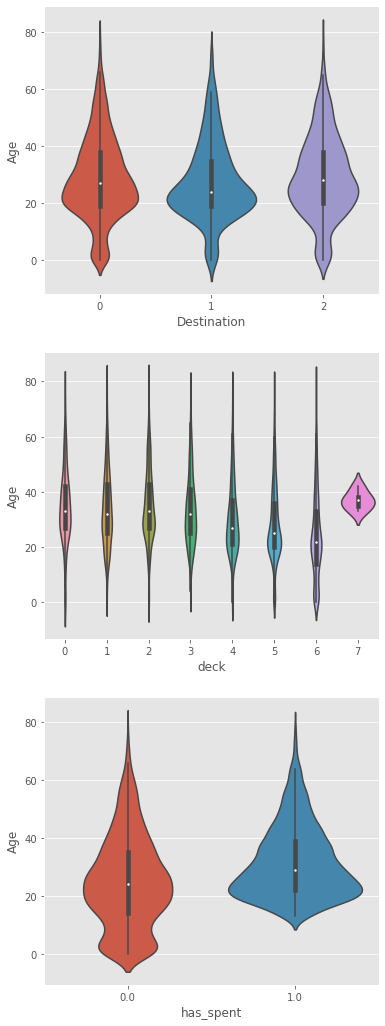

In [34]:
#investigating Age for filling in Nulls
#plotting the features which had the strongest correlation with Age
fig, saxis = plt.subplots(3,figsize=(6,18)) 

sns.violinplot(x = 'Destination', y = 'Age', data=train, ax = saxis[0])
sns.violinplot(x = 'deck', y = 'Age', data=train, ax = saxis[1])
sns.violinplot(x = 'has_spent', y = 'Age', data=train, ax = saxis[2])
# preparing an empty array to contain guessed Age values based on Destination x deck x has_spent combinations since these were shown to correlate the most
Age_guess = np.zeros((3,8,2))
age_guess = np.zeros((3,8,2))
Age_guess

# now we iterate over Destination, deck and has_spent to calculate guessed values of Age
for i in range(3):
    for j in range(8):
        for k in range(2):
            guess_df = train[(train['Destination'] == i) & (train['deck'] == j) & (train['has_spent'] == k)]['Age'].dropna()

            Age_guess[i,j,k] = guess_df.mean()
            
#add guesses to nulls
for i in range(3):
    for j in range(7):
        for k in range(2):
            train.loc[ (train.Age.isnull()) & (train.HomePlanet == i) & (train.deck == j) & (train.has_spent == k),'Age'] = Age_guess[i,j,k]

for i in range(3):
    for j in range(7):
        for k in range(2):
            test.loc[ (test.Age.isnull()) & (test.HomePlanet == i) & (test.deck == j) & (test.has_spent == k),'Age'] = Age_guess[i,j,k]

In [35]:
#Continuous variable put in bins to reduce overfitting to noise
train['AgeBin1'] = pd.qcut(train['Age'], 4)
train.AgeBin1.unique()

#then the original column can be converted to ordinals
for df in combine:
    df.loc[ df['Age'] <= 19, 'AgeBin'] = 0
    df.loc[(df['Age'] > 19) & (df['Age'] <= 27), 'AgeBin'] = 1
    df.loc[(df['Age'] > 27) & (df['Age'] <= 38), 'AgeBin'] = 2
    df.loc[(df['Age'] > 38) & (df['Age'] <= 79), 'AgeBin'] = 3  

#the bin1 column can then be dropped
train = train.drop(['AgeBin1'], axis=1)

#### VIP

In [36]:
#Number of VIPs is v small and there doesnt seem to be anything that can predict them. Therefore setting nulls to 0
train.loc[(train.VIP.isnull()),'VIP'] = 0
test.loc[(test.VIP.isnull()),'VIP'] = 0

In [37]:
#Final check that all columns used for predictions have no NaN values
print('Train columns with null values:\n', train.isnull().sum())
print("-"*10)
print('Test columns with null values:\n', test.isnull().sum())
print("-"*10)
print (train.info())
print (test.info())

Train columns with null values:
 PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin              199
Destination          0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Name               200
Transported          0
total_spend          0
group                0
is_alone             0
deck                 0
Name_length          0
nl_short             0
has_spent            0
RoomServiceBin       0
FoodCourtBin         0
ShoppingMallBin      0
SpaBin               0
VRDeckBin            0
places_spent         0
total_spend_log      0
RoomServiceLog       0
FoodCourtLog         0
ShoppingMallLog      0
SpaLog               0
VRDeckLog            0
AgeBin               0
dtype: int64
----------
Test columns with null values:
 PassengerId          0
HomePlanet           0
CryoSleep            0
Cabin              100
Destination          0
Age           

### Labelling

Assigning new variables to help with ML and graphing

In [38]:
#define y variable aka target/outcome
Target = ['Transported']

#define x variables for original features aka feature selection
x = ['HomePlanet','CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_length', 'total_spend', 'group','deck']
xy = Target + x
print('Original X Y: ', xy, '\n')


#define x variables for original w/bin features to remove continuous variables
#with binary spend colums
#x_bin = ['HomePlanet','CryoSleep', 'Destination', 'AgeBin', 'VIP', 'RoomServiceBin', 'FoodCourtBin', 'ShoppingMallBin', 'SpaBin', 'VRDeckBin', 'has_spent', 'is_alone','deck'] #pretty name/values for charts
#with Log10 spend columns
x_bin = ['HomePlanet','CryoSleep', 'Destination', 'AgeBin', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 'total_spend_log','deck'] #pretty name/values for charts
xy_bin =  Target + x_bin
print('Bin X Y: ', xy_bin, '\n')

#setting bin variables to int
for x in x_bin:
    train[x] = train[x].astype(int)
    test[x] = test[x].astype(int)

Original X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_length', 'total_spend', 'group', 'deck'] 

Bin X Y:  ['Transported', 'HomePlanet', 'CryoSleep', 'Destination', 'AgeBin', 'RoomServiceLog', 'FoodCourtLog', 'ShoppingMallLog', 'SpaLog', 'VRDeckLog', 'total_spend_log', 'deck'] 



# Perform Exploratory Analysis

In [39]:
# Analyze by pivoting features

x_columns_list = ['HomePlanet', 'CryoSleep', 'Destination', 'has_spent', 'is_alone', 'deck', 'AgeBin']
Target = ['Transported']

for x in x_columns_list:
    if train[x].dtype != 'float64' :
        print('Transported Correlation by:', x)
        print(train[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

Transported Correlation by: HomePlanet
   HomePlanet  Transported
0           0     0.660360
1           1     0.424024
2           2     0.523153
---------- 

Transported Correlation by: CryoSleep
   CryoSleep  Transported
0          0     0.328176
1          1     0.814673
---------- 

Transported Correlation by: Destination
   Destination  Transported
0            0     0.472199
1            1     0.503769
2            2     0.610000
---------- 

Transported Correlation by: is_alone
   is_alone  Transported
0         0     0.566872
1         1     0.452445
---------- 

Transported Correlation by: deck
   deck  Transported
0     0     0.500000
1     1     0.727825
2     2     0.680739
3     3     0.434783
4     4     0.357955
5     5     0.439900
6     6     0.512879
7     7     0.200000
---------- 

Transported Correlation by: AgeBin
   AgeBin  Transported
0       0     0.588971
1       1     0.461837
2       2     0.472735
3       3     0.494241
---------- 



<AxesSubplot:xlabel='AgeBin', ylabel='Transported'>

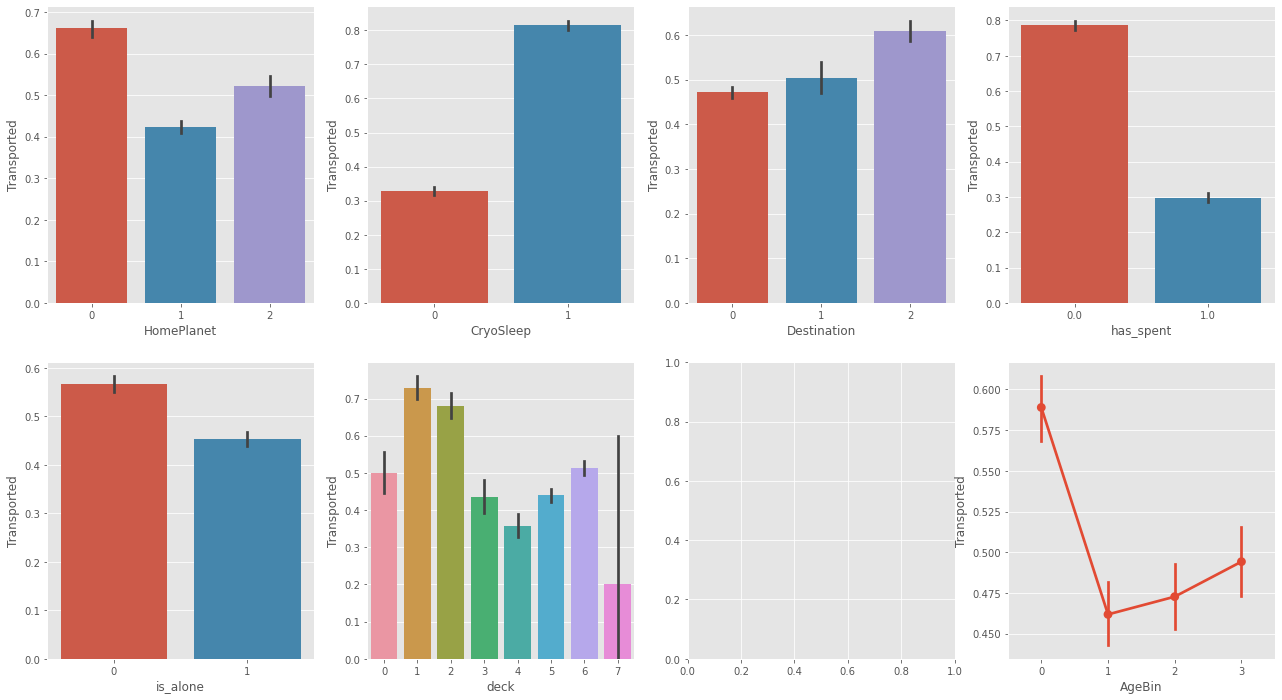

In [40]:
#graph individual features by survival
fig, saxis = plt.subplots(2, 4,figsize=(22,12)) # 2x3 is how many plots you have

sns.barplot(x = 'HomePlanet', y = 'Transported', data=train, ax = saxis[0,0])
sns.barplot(x = 'CryoSleep', y = 'Transported', data=train, ax = saxis[0,1])
sns.barplot(x = 'Destination', y = 'Transported', data=train, ax = saxis[0,2])
sns.barplot(x = 'has_spent', y = 'Transported', data=train, ax = saxis[0,3])
sns.barplot(x = 'is_alone', y = 'Transported', data=train, ax = saxis[1,0])
sns.barplot(x = 'deck', y = 'Transported', data=train, ax = saxis[1,1])
#sns.barplot(x = 'side', y = 'Transported', data=train, ax = saxis[1,2])
sns.pointplot(x = 'AgeBin', y = 'Transported',  data=train, ax = saxis[1,3])

**Observations:**

- No real difference in % transported and home planet
- Much more likely to have been transported if in cryosleep
- No real difference in % transported and destination
- Much more likely to have been transported if not spent
- No real difference in % transported and not in a group
- Some decks had a higher transported % from 
- No real difference in % transported and which side of ship

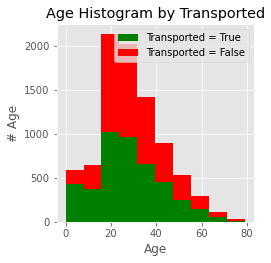

In [41]:
#histogram with the Age variables seperated by 'Transported' stacked on top of each other on the plot
plt.subplot(234)
plt.hist(x = [train[train['Transported']==1]['Age'], train[train['Transported']==0]['Age']], 
         stacked=True, color = ['g','r'],label = ['Transported = True','Transported = False'])
plt.title('Age Histogram by Transported')
plt.xlabel('Age')
plt.ylabel('# Age')
plt.legend()

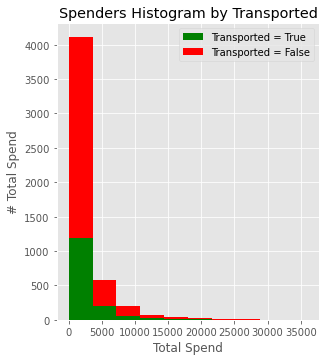

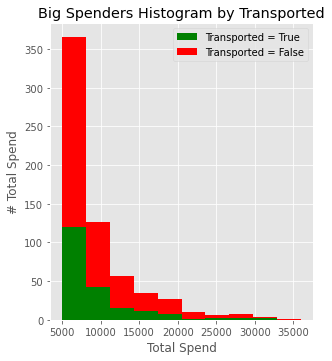

In [42]:
#histogram with the spending variables seperated by 'Transported' stacked on top of each other on the plot
plt.figure(figsize=[16,12])
plt.subplot(234)
plt.hist(x = [spenders[spenders['Transported']==1]['total_spend'], spenders[spenders['Transported']==0]['total_spend']], 
         stacked=True, color = ['g','r'],label = ['Transported = True','Transported = False'])
plt.title('Spenders Histogram by Transported')
plt.xlabel('Total Spend')
plt.ylabel('# Total Spend')
plt.legend()


plt.figure(figsize=[16,12])
plt.subplot(234)
plt.hist(x = [big_spenders[big_spenders['Transported']==1]['total_spend'], big_spenders[big_spenders['Transported']==0]['total_spend']], 
         stacked=True, color = ['g','r'],label = ['Transported = True','Transported = False'])
plt.title('Big Spenders Histogram by Transported')
plt.xlabel('Total Spend')
plt.ylabel('# Total Spend')
plt.legend()

**Observations:**

- Ratio of Transported/Not Transported seems similar no matter the amount of spend

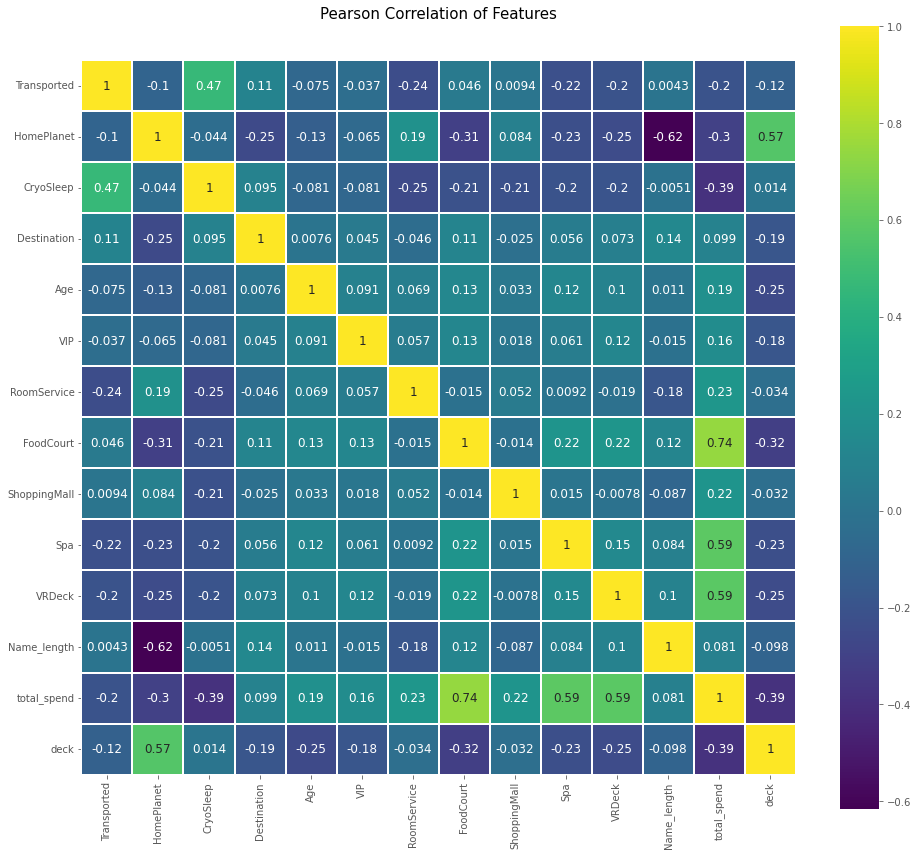

In [43]:
#correlation heatmap
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(16, 16))
    colormap = sns.color_palette("viridis", as_cmap=True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train[xy])

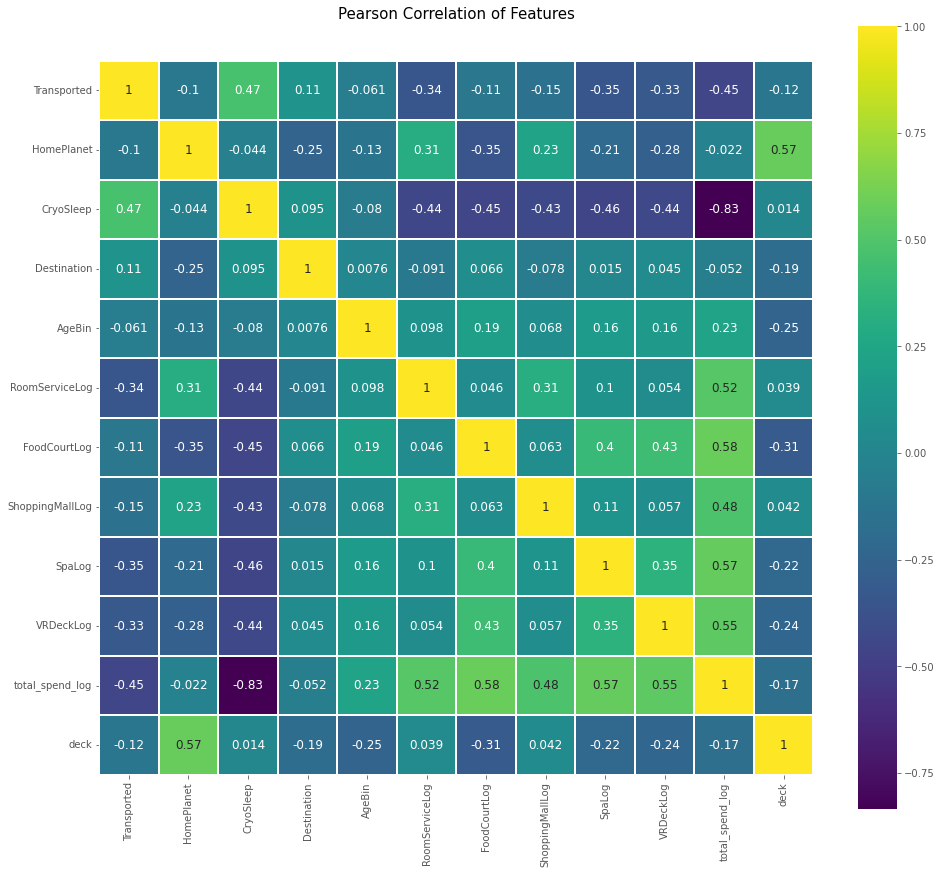

In [44]:
correlation_heatmap(train[xy_bin])

**Observations:**

Features that are correlated:
- Transported and Cryo Sleep
- Home planet and name length
- Home planet and deck
- Total spend and food court, vr deck and spa
- has_spent and Cryo Sleep and therefore all the spending bins since they are strongly correlated to has spent

Independent features:
- Destination 
- Age
- VIP
- Room Service
- Shopping Mall
- Is alone

**Decisions:** 
- Investigate further into correlated values to help replace null values


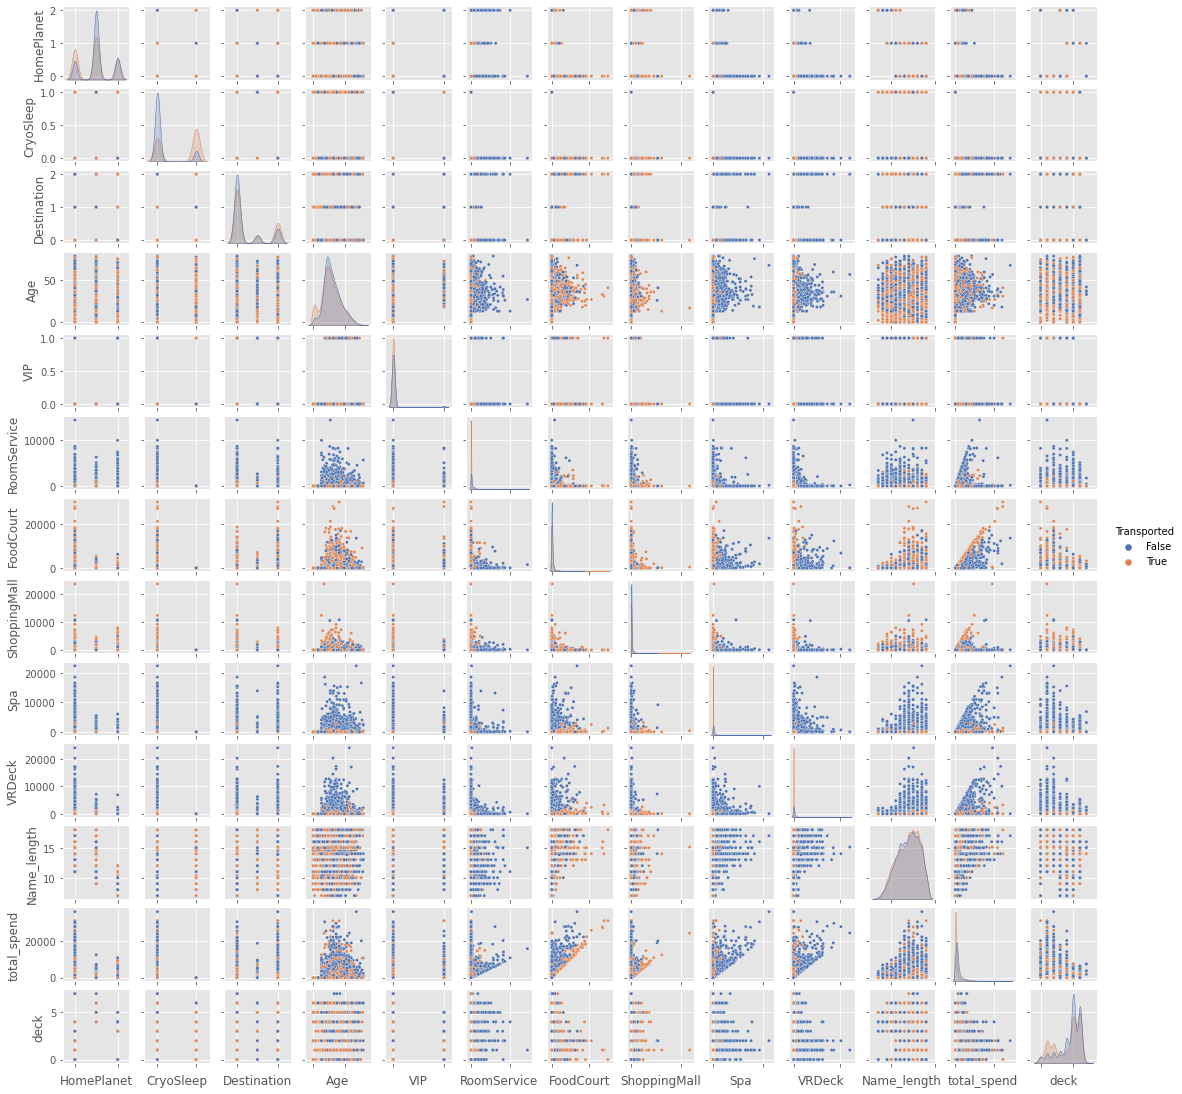

In [45]:
#pair plots of entire dataset
pp = sns.pairplot(train[xy], hue = 'Transported', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

In [46]:
#save wrangled test and train data
train.to_csv("train_wrangled.csv", index=False)
test.to_csv("test_wrangled.csv", index=False)